In [110]:
import scanpy as sc
import matplotlib.pyplot as plt
import scprep
import numpy as np

In [111]:
res_dir = '../results_Mar4'
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')
filtered_bc = np.load(f'{res_dir}/day0_filtered_barcodes.npy', allow_pickle=True)
adata_filtered = adata[filtered_bc,:]

In [112]:
# Check if there's any normalization info stored
print("Preprocessing info in .uns:", adata.uns.keys())

Preprocessing info in .uns: dict_keys(['emt_weights', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors', 'sample_id_colors'])


In [113]:
# Check value ranges in the data matrix
print("Data value ranges:")
print("Min:", adata.X.min())
print("Max:", adata.X.max())
print("Mean:", adata.X.mean())

# If the data is log-transformed, values should typically be:
# - No negative values
# - Maximum values usually < 10
# - Many values between 0-2

Data value ranges:
Min: 0.0
Max: 71.49545
Mean: 0.22005719


In [114]:
# Check if raw counts are stored in layers
print("Available layers:", adata.layers.keys())
# Common layer names for raw data: 'counts', 'raw'

Available layers: KeysView(Layers with keys: )


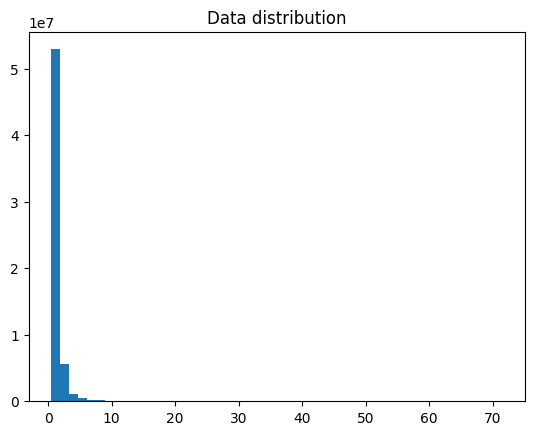

In [115]:
import matplotlib.pyplot as plt
import scipy.sparse

# Get dense array if data is sparse
if scipy.sparse.issparse(adata.X):
    values = adata.X.data
else:
    values = adata.X.flatten()

plt.hist(values, bins=50)
plt.title('Data distribution')
plt.show()

# Log-normalized data typically shows:
# - No zero-inflation (if zeros were handled)
# - Roughly normal distribution
# - Values mostly between 0-10

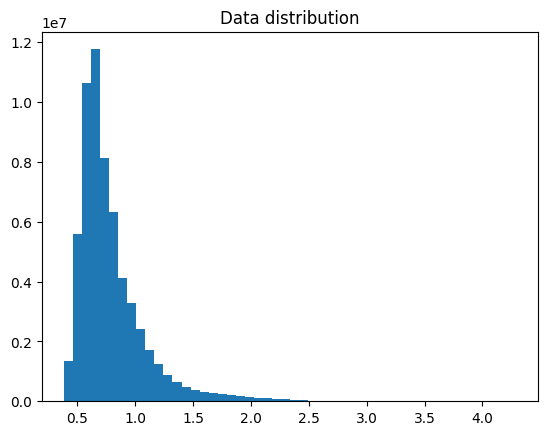

In [116]:
plt.hist(np.log1p(values), bins=50)
plt.title('Data distribution')
plt.show()

In [117]:
# sc.pp.log1p(adata_filtered)
# sc.pp.sqrt(adata_filtered)

In [118]:
genes_to_plot = ['EPCAM', 'CAV1', 'MMP7', 'VCAN', 'ANXA5', 'CD44']

# Check if each gene is in adata_filtered.var_names
for gene in genes_to_plot:
    assert gene in adata_filtered.var_names, f"Gene {gene} not found in dataset"

<Axes: >

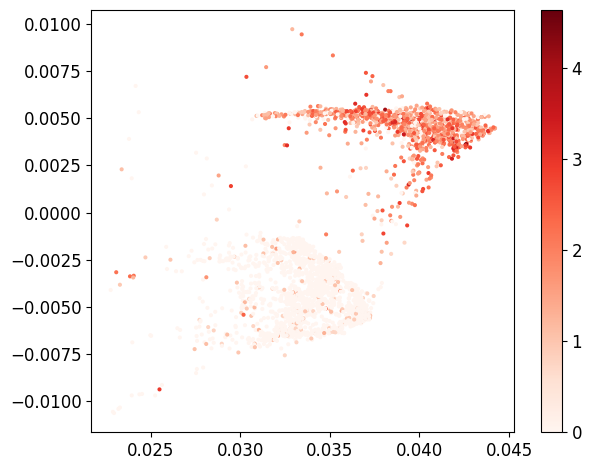

In [119]:
gene = genes_to_plot[0]
scprep.plot.scatter2d(adata_filtered.obsm['X_phate'], adata_filtered[:,gene].to_df(), cmap='Reds')


In [120]:
from sklearn.cluster import KMeans

# Cluster the PHATE embedding into 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
adata_filtered.obs['kmeans_cluster'] = kmeans.fit_predict(adata_filtered.obsm['X_phate'])
adata_filtered_0 = adata_filtered[adata_filtered.obs['kmeans_cluster'] == 0]

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/tmp/ipykernel_1988795/1956637027.py:5: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_filtered.obs['kmeans_cluster'] = kmeans.fit_predict(adata_filtered.obsm['X_phate'])


<Axes: >

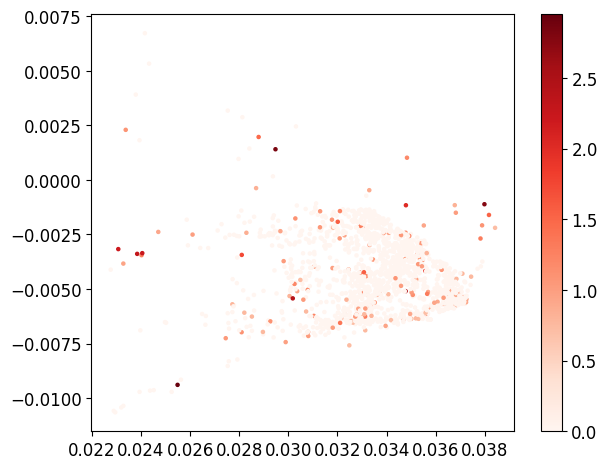

In [121]:
scprep.plot.scatter2d(adata_filtered_0.obsm['X_phate'], adata_filtered_0[:,gene].to_df(), cmap='Reds')

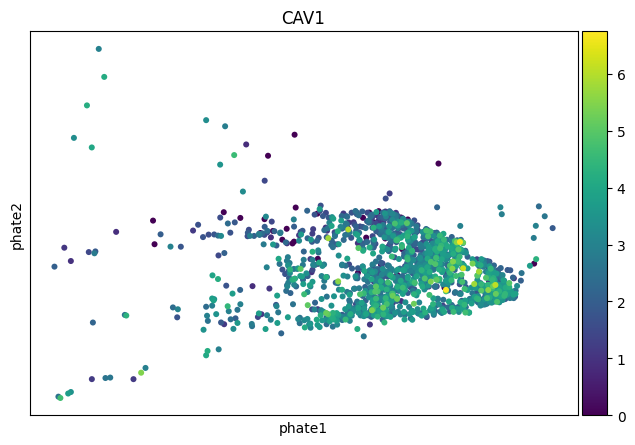

In [122]:
sc.pl.scatter(adata_filtered_0, basis='phate', color='CAV1')

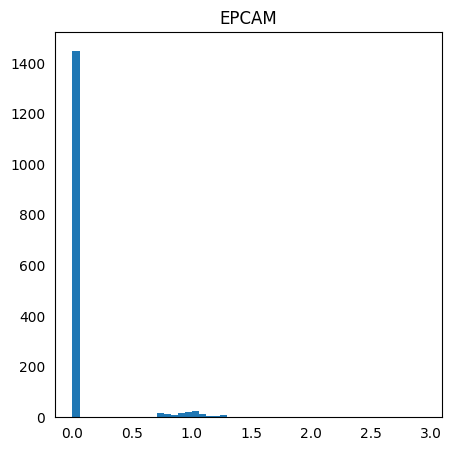

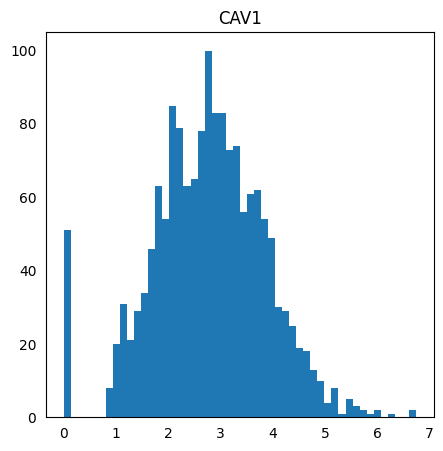

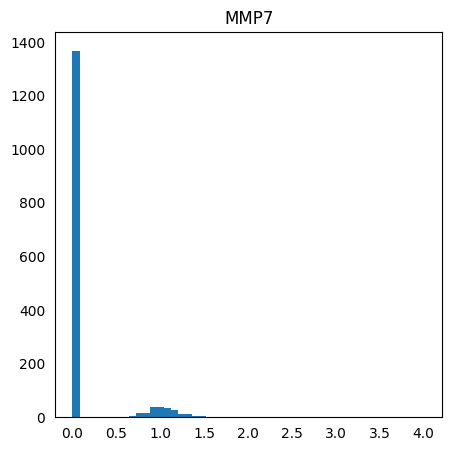

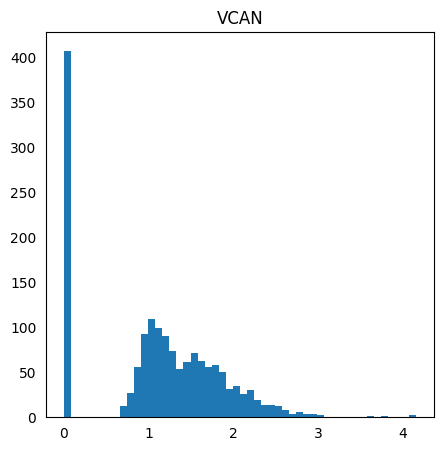

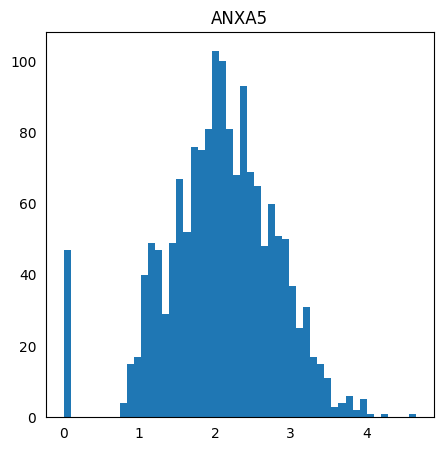

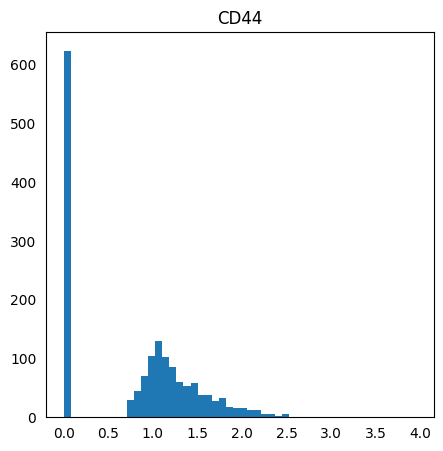

In [128]:
for gene in genes_to_plot:
    plt.figure(figsize=(5, 5))
    # plt.scatter(adata_filtered_0.obsm['X_phate'][:,0], adata_filtered_0.obsm['X_phate'][:,1], c=adata_filtered_0[:,gene].to_df().values, cmap='Reds', s=5)
    plt.hist(adata_filtered_0[:,gene].to_df().values, bins=50)
    plt.tick_params(left=False, bottom=False)
    # plt.xticks([])
    # plt.yticks([])
    # plt.xlabel('PHATE1')
    # plt.ylabel('PHATE2')
    plt.title(gene)
    plt.show()

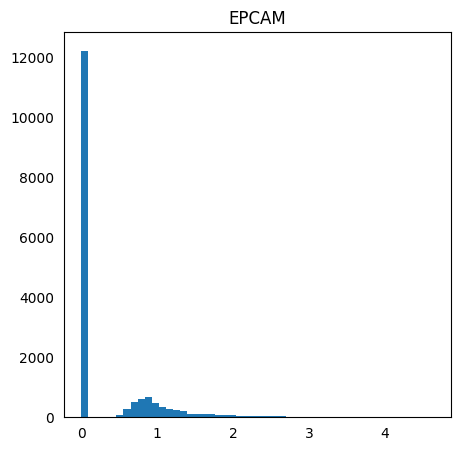

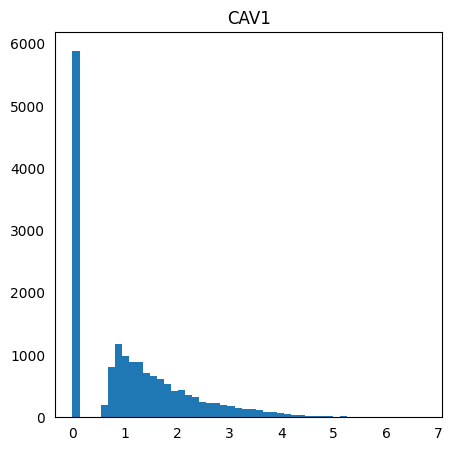

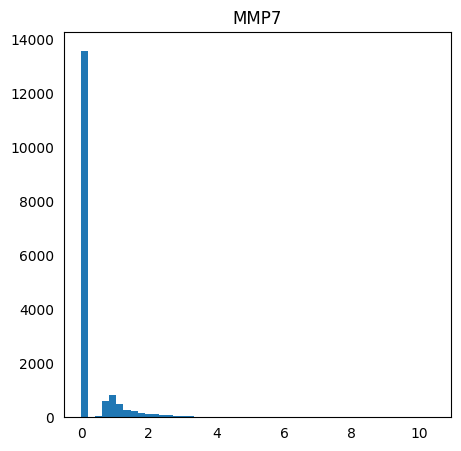

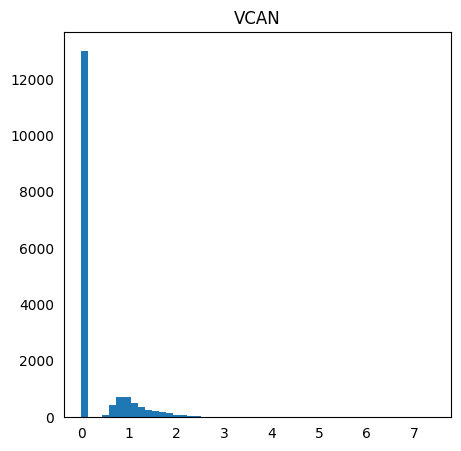

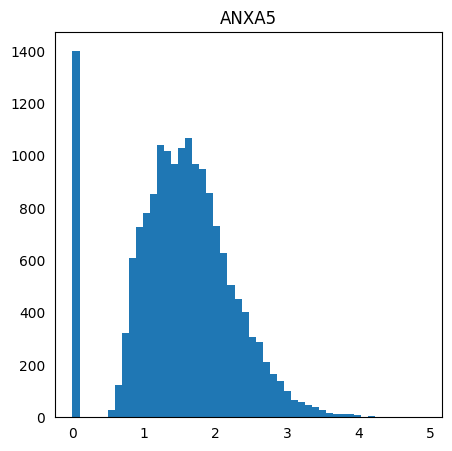

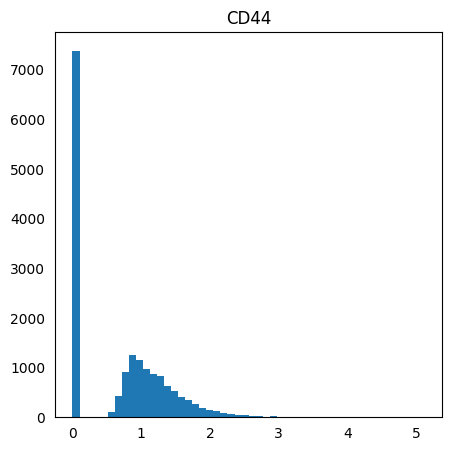

In [129]:
for gene in genes_to_plot:
    plt.figure(figsize=(5, 5))
    # plt.scatter(adata_filtered_0.obsm['X_phate'][:,0], adata_filtered_0.obsm['X_phate'][:,1], c=adata_filtered_0[:,gene].to_df().values, cmap='Reds', s=5)
    plt.hist(adata[:,gene].to_df().values, bins=50)
    plt.tick_params(left=False, bottom=False)
    # plt.xticks([])
    # plt.yticks([])
    # plt.xlabel('PHATE1')
    # plt.ylabel('PHATE2')
    plt.title(gene)
    plt.show()

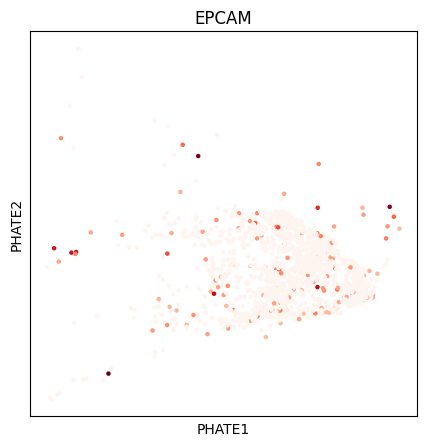

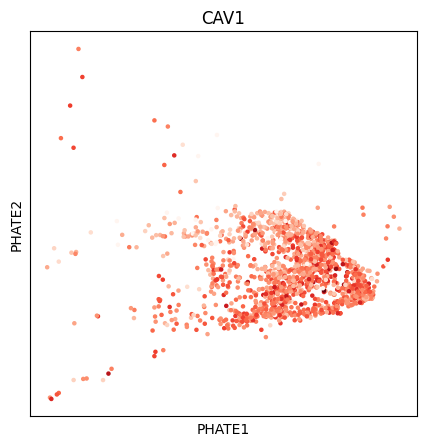

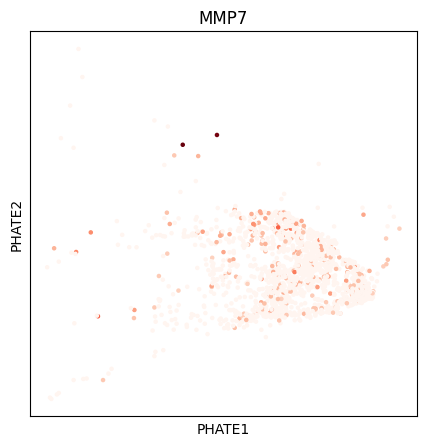

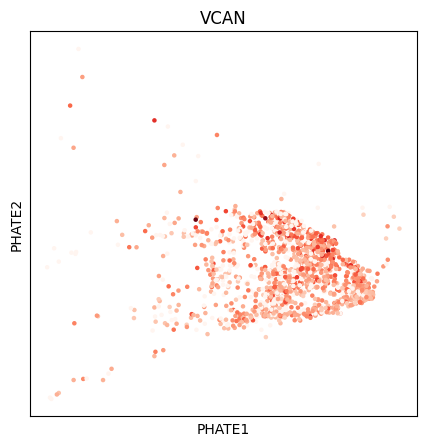

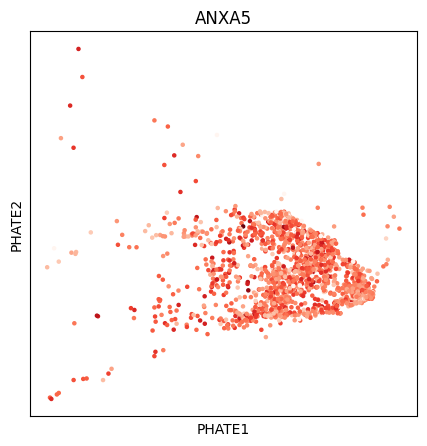

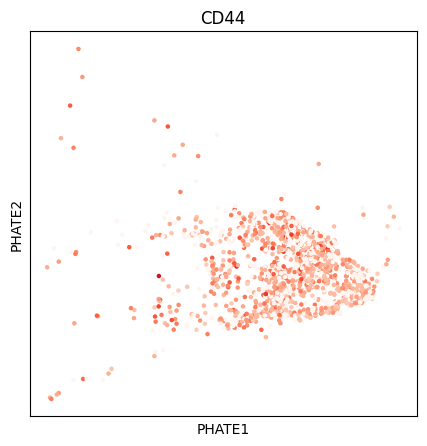

In [130]:
for gene in genes_to_plot:
    plt.figure(figsize=(5, 5))
    plt.scatter(adata_filtered_0.obsm['X_phate'][:,0], adata_filtered_0.obsm['X_phate'][:,1], c=adata_filtered_0[:,gene].to_df().values, cmap='Reds', s=5)
    plt.tick_params(left=False, bottom=False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('PHATE1')
    plt.ylabel('PHATE2')
    plt.title(gene)
    plt.show()

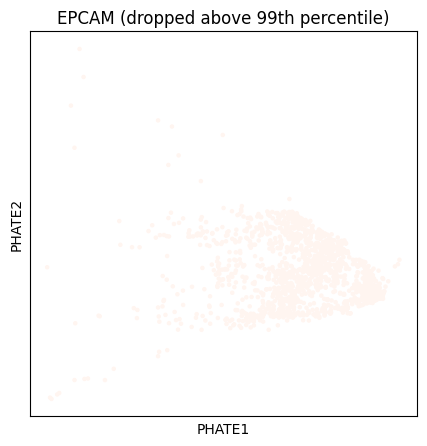

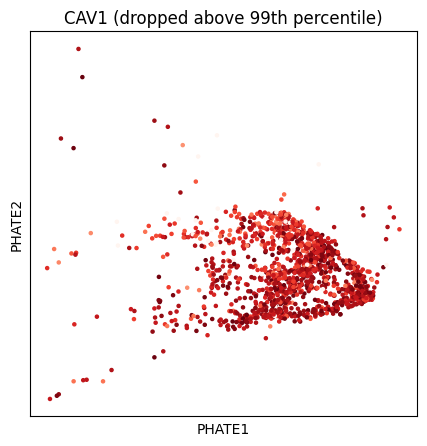

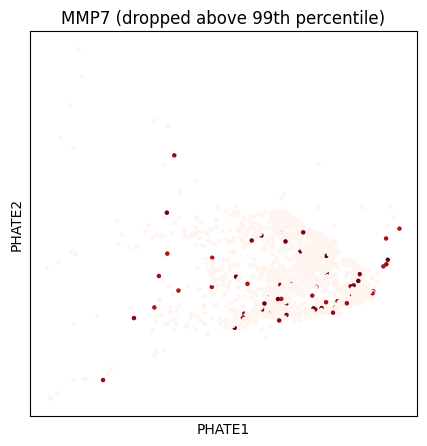

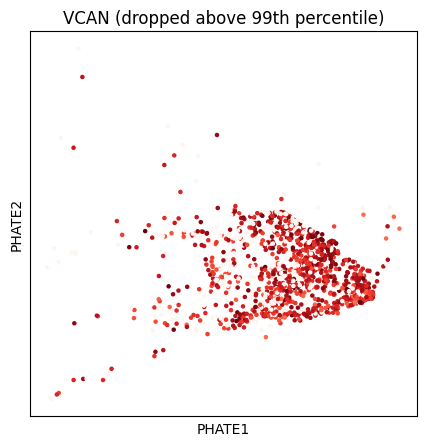

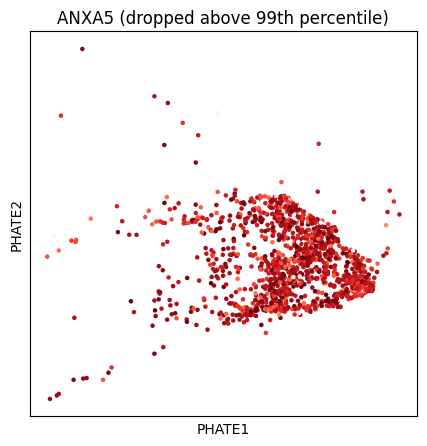

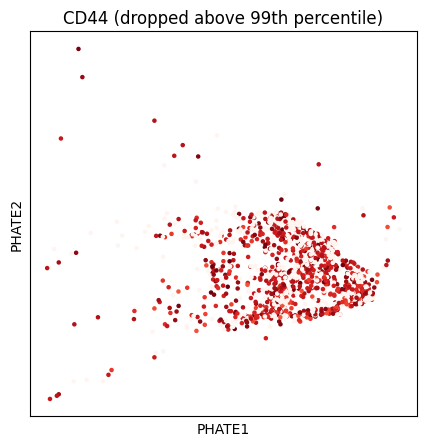

In [ ]:
for gene in genes_to_plot:
    plt.figure(figsize=(5, 5))
    # Get gene expression values
    gene_values = adata_filtered_0[:,gene].to_df().values.flatten()
    
    # Calculate 99th percentile and filter values
    percentile_99 = np.percentile(gene_values, 90)
    mask = gene_values <= percentile_99
    
    # Plot only values below 99th percentile
    plt.scatter(adata_filtered_0.obsm['X_phate'][mask,0], adata_filtered_0.obsm['X_phate'][mask,1], 
                c=np.log1p(gene_values[mask]), cmap='Reds', s=5)
    plt.tick_params(left=False, bottom=False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('PHATE1')
    plt.ylabel('PHATE2')
    plt.title(f"{gene} (dropped above 99th percentile)")
    plt.show()

In [144]:
import magic
magic_op = magic.MAGIC()
magic_op.fit(adata_filtered_0.obsm['X_pca'])

Running MAGIC on 1595 cells and 50 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.15 seconds.
  Calculating affinities...
  Calculated affinities in 0.15 seconds.
Calculated graph and diffusion operator in 0.30 seconds.


MAGIC(knn_max=15)

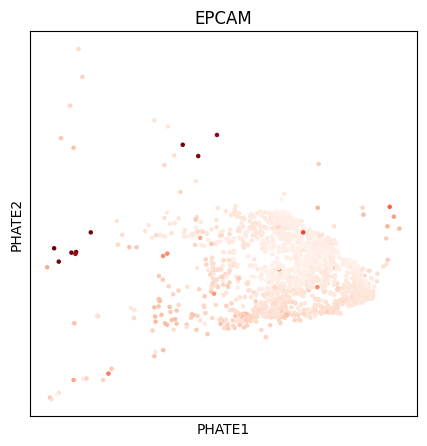

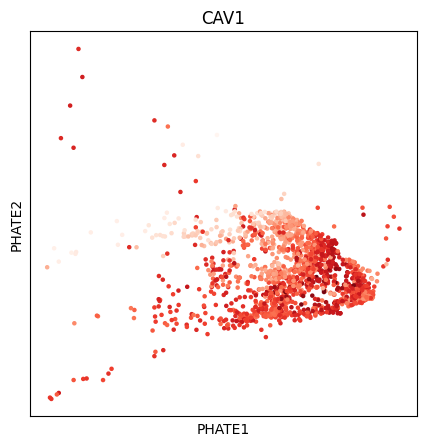

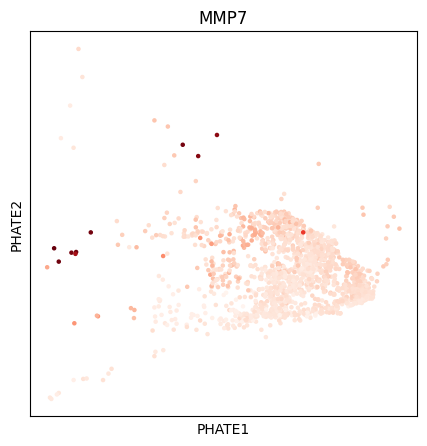

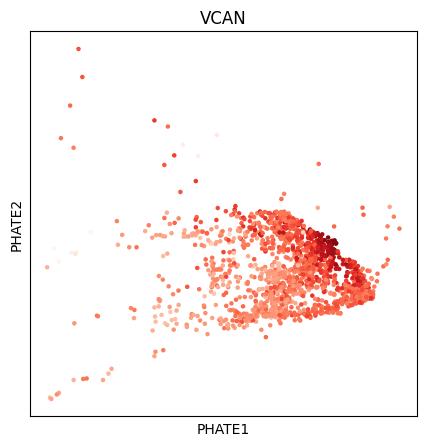

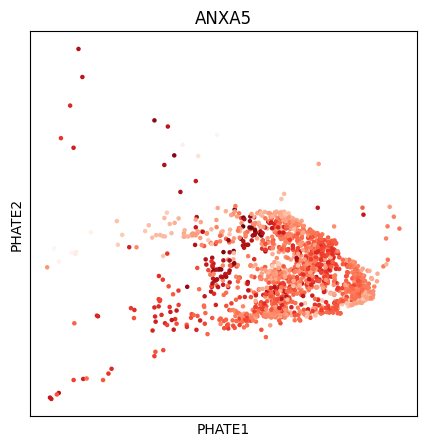

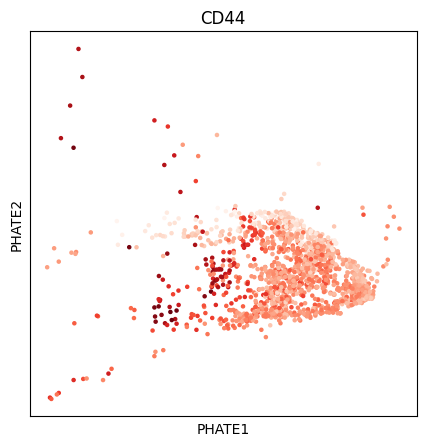

In [ ]:
denoised_expr = magic_op.transform(adata_filtered_0[:,genes_to_plot].to_df())

for gene in genes_to_plot:
    plt.figure(figsize=(5, 5))
    plt.scatter(adata_filtered_0.obsm['X_phate'][:,0], adata_filtered_0.obsm['X_phate'][:,1], c=denoised_expr[gene].values, cmap='Reds', s=5)
    plt.tick_params(left=False, bottom=False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('PHATE1')
    plt.ylabel('PHATE2')
    plt.title(gene)
    plt.show()

Calculating imputation...


/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/magic/magic.py:541: UserWarning: Running MAGIC.transform on different data to that which was used for MAGIC.fit may not produce sensible output, unless it comes from the same manifold.
  warnings.warn(


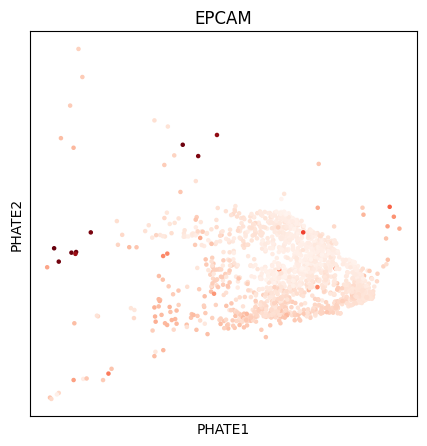

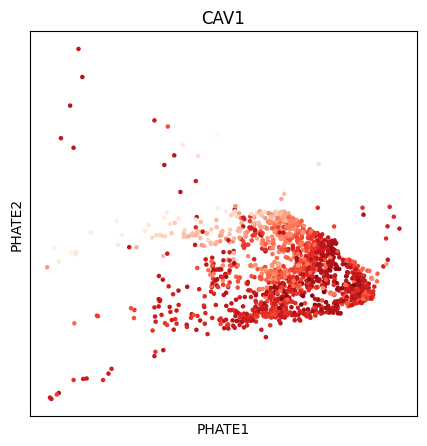

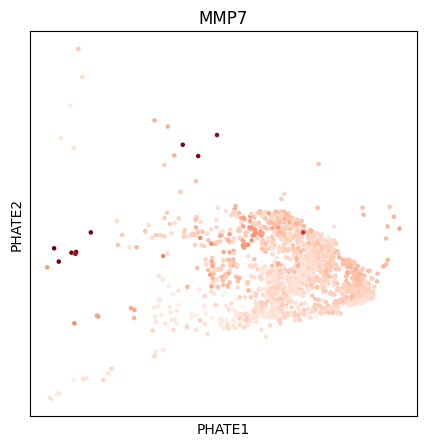

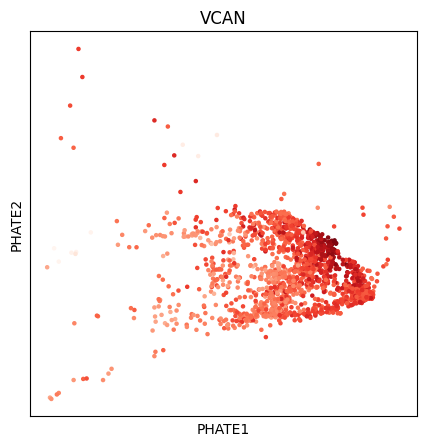

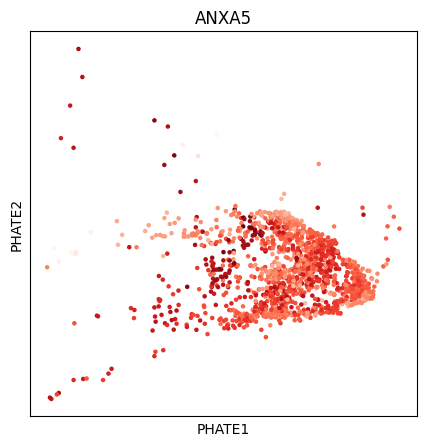

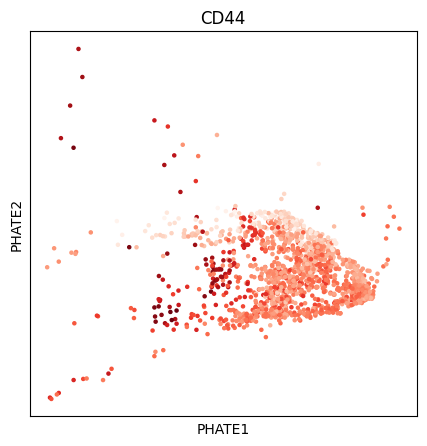

In [150]:
denoised_expr = magic_op.transform(adata_filtered_0[:,genes_to_plot].to_df().apply(np.log1p))

for gene in genes_to_plot:
    plt.figure(figsize=(5, 5))
    plt.scatter(adata_filtered_0.obsm['X_phate'][:,0], adata_filtered_0.obsm['X_phate'][:,1], c=denoised_expr[gene].values, cmap='Reds', s=5)
    plt.tick_params(left=False, bottom=False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('PHATE1')
    plt.ylabel('PHATE2')
    plt.title(gene)
    plt.show()

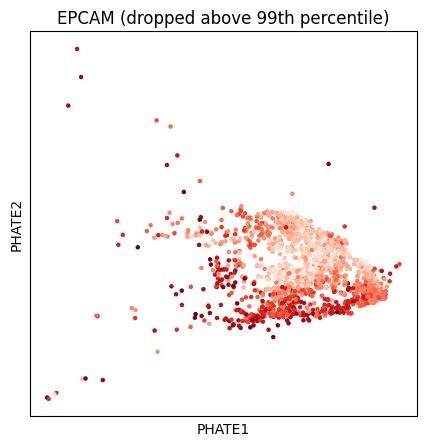

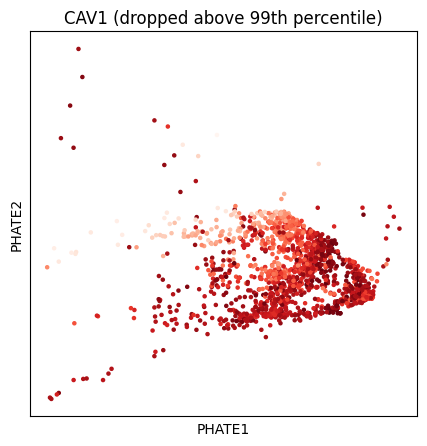

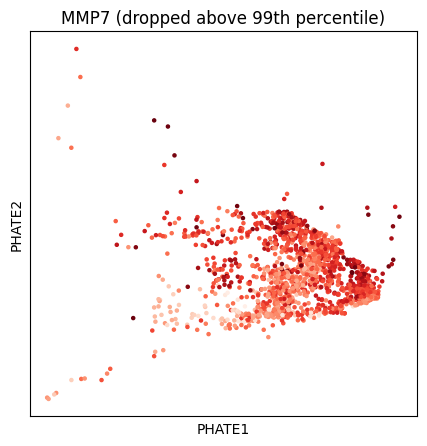

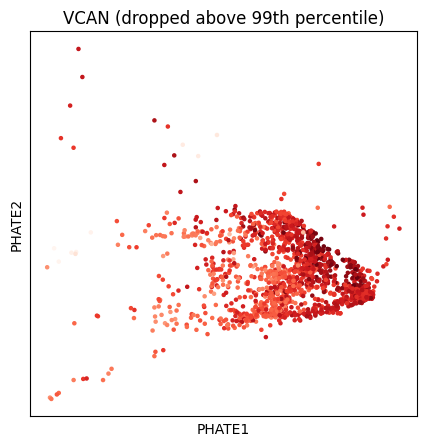

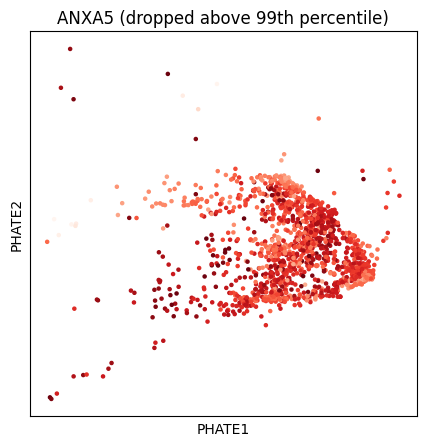

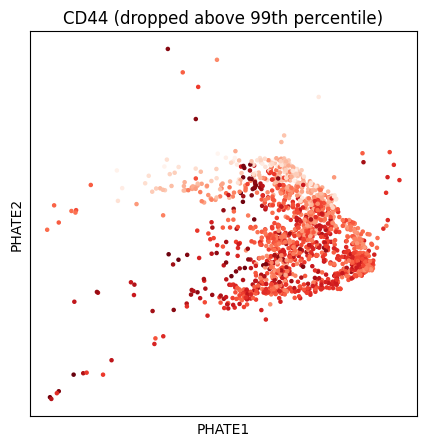

In [ ]:
for gene in genes_to_plot:
    plt.figure(figsize=(5, 5))
    # Get gene expression values
    gene_expr = denoised_expr[gene].values
    
    # Calculate 99th percentile threshold to remove outliers
    threshold = np.percentile(gene_expr, 95)
    
    # Create a mask for values below the threshold
    mask = gene_expr <= threshold
    
    # Plot only non-outlier points
    plt.scatter(
        adata_filtered_0.obsm['X_phate'][mask, 0], 
        adata_filtered_0.obsm['X_phate'][mask, 1], 
        c=gene_expr[mask], 
        cmap='Reds', 
        s=5
    )
    plt.tick_params(left=False, bottom=False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('PHATE1')
    plt.ylabel('PHATE2')
    plt.title(f"{gene} (dropped above 95th percentile)")
    plt.show()

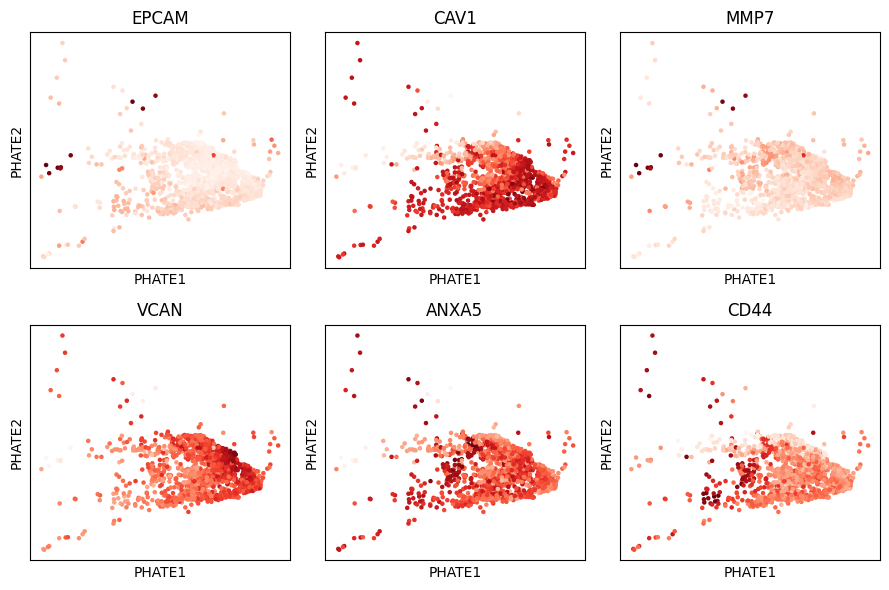

In [ ]:
# Create a figure with 2 rows of subplots
num_genes = len(genes_to_plot)
num_cols = 3  # 3 columns to fit 6 genes in 2 rows
fig, axes = plt.subplots(2, num_cols, figsize=(9, 6))
axes = axes.flatten()

for i, gene in enumerate(genes_to_plot):
    # Get gene expression values
    gene_expr = denoised_expr[gene].values
    
    # Calculate 95th percentile threshold to remove outliers
    threshold = np.percentile(gene_expr, 99)
    
    # Create a mask for values below the threshold
    mask = gene_expr <= threshold
    
    # Plot only non-outlier points on the appropriate subplot
    axes[i].scatter(
        adata_filtered_0.obsm['X_phate'][mask, 0], 
        adata_filtered_0.obsm['X_phate'][mask, 1], 
        c=gene_expr[mask], 
        cmap='Reds', 
        s=5
    )
    axes[i].tick_params(left=False, bottom=False)
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel('PHATE1')
    axes[i].set_ylabel('PHATE2')
    axes[i].set_title(f"{gene}")

plt.tight_layout()
plt.show()

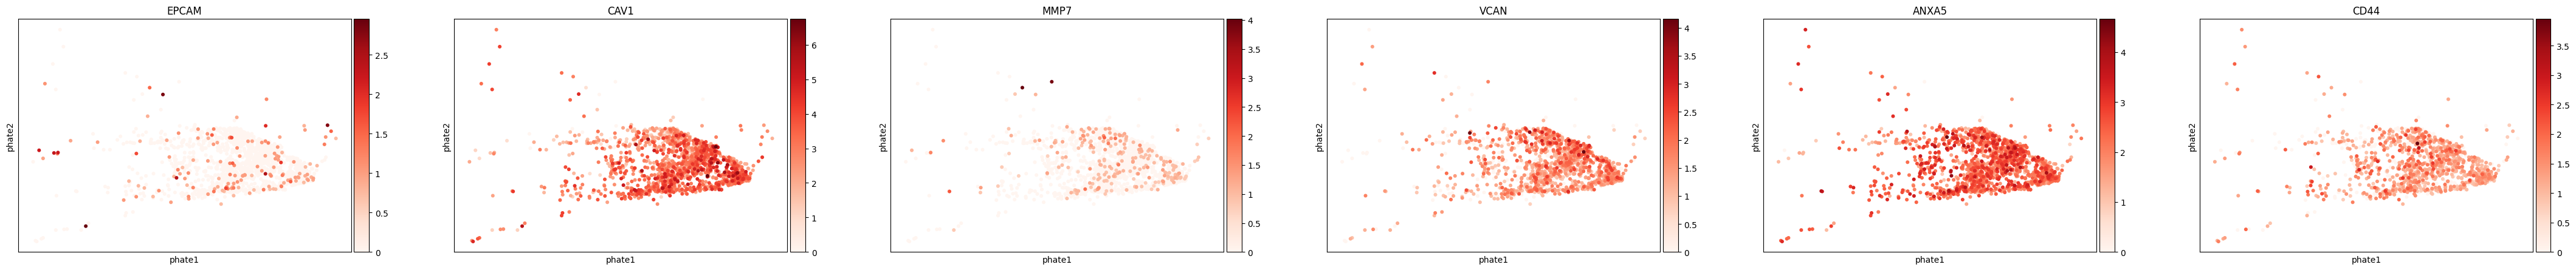

In [125]:
sc.pl.scatter(adata_filtered_0, basis='phate', color=genes_to_plot, color_map='Reds')

In [126]:
adata_filtered_0.obs['louvain']

AAACCTGAGTTCGCGC-1-4    5
AAACCTGCATGTTGAC-1-4    5
AAACCTGGTCGAACAG-1-4    5
AAACCTGTCCGTTGCT-1-4    5
AAACCTGTCTACTATC-1-4    5
                       ..
TTTGCGCTCACTTATC-1-4    5
TTTGGTTAGATGCGAC-1-4    5
TTTGGTTGTCTCCATC-1-4    5
TTTGGTTGTTGCCTCT-1-4    5
TTTGTCAGTTGATTCG-1-4    5
Name: louvain, Length: 1595, dtype: category
Categories (2, object): ['5', '6']

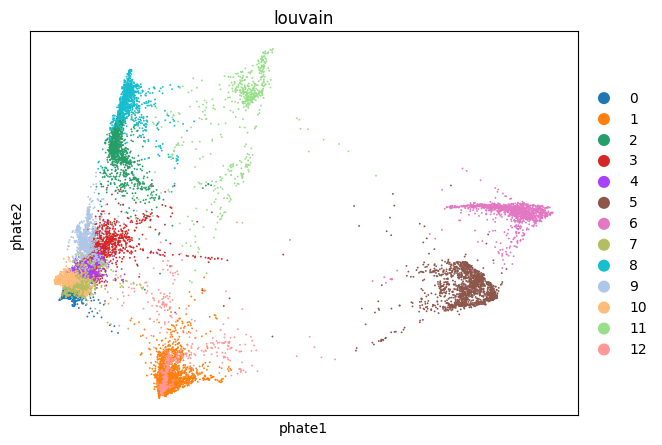

In [127]:
sc.pl.scatter(adata, basis='phate', color='louvain')